## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points
### Submitted By: ATAISH NEHRA

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with AG News Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


The ag news dataset comprises around 18000 news text in 4 categories.

In [2]:
# Read the csv file agnews.csv
mydata_train = pd.read_csv("agnews.csv")

In [3]:
# Print the news categories in the dataset
categories = mydata_train["ClassIndex"].unique()
print(list(categories))

[1, 2, 3, 4]


In [4]:
# Print the news categories in the dataset
print(list(mydata_train.ClassIndex))

[1, 1, 1, 1, 2, 2, 1, 1, 3, 4, 2, 4, 4, 3, 2, 2, 4, 3, 4, 4, 3, 3, 2, 1, 2, 3, 2, 2, 4, 4, 2, 1, 2, 4, 1, 1, 1, 1, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 2, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 4, 4, 1, 2, 1, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 4, 4, 4, 3, 4, 1, 2, 1, 4, 2, 3, 1, 1, 2, 4, 4, 4, 4, 4, 2, 1, 4, 4, 2, 1, 1, 3, 1, 1, 3, 1, 2, 2, 3, 4, 2, 4, 4, 4, 1, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1, 1, 4, 1, 2, 4, 3, 1, 4, 2, 1, 3, 3, 3, 4, 1, 3, 3, 2, 1, 3, 3, 2, 4, 4, 2, 3, 4, 3, 1, 3, 3, 2, 3, 1, 1, 2, 2, 2, 4, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 4, 1, 1, 3, 3, 2, 4, 3, 3, 1, 3, 2, 2, 1, 3, 4, 1, 2, 1, 3, 2, 1, 2, 1, 4, 1, 1, 3, 3, 3, 2, 3, 2, 4, 2, 2, 2, 1, 1, 3, 1, 2, 4, 4, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 4, 2, 1, 4, 1, 1, 1, 4, 1, 1, 3, 4, 2, 3, 1, 3, 2, 4, 3, 3, 1, 3, 2, 4, 4, 4, 2, 1, 1, 1, 2, 3, 4, 1, 2, 3, 2, 1, 4, 2, 2, 3, 4, 3, 3, 3, 3, 4, 2, 1, 1, 3, 3, 2, 3, 4, 3, 3, 4, 3, 4, 1, 2, 2, 4, 4, 4, 3, 1, 4, 4, 4, 4, 2, 3, 3, 3, 4, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 4, 3, 2, 3, 3, 2, 3, 4, 2, 4, 3, 3, 1, 

In [5]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Check the length of the data
print(len(mydata_train.ClassIndex))
print(len(mydata_train.Description))


18000
18000


### Expected Output: 
18000

18000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [7]:
text = mydata_train.Description

## Preprocessing the Corpus

In [8]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Preprocessing the data

lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    new_line = [l.lower() for l in word_tokenize(line) if l.isalpha()]
    lines.append(new_line)
    for word in new_line:
        if word not in word_list:
            word_list.append(word)

word_list = list(set(word_list))

# Calculate the total documents present in the corpus
total_docs = len(lines)
print(total_docs)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
i = 0
for word in word_list:
    dict_idx[word] = i
    i += 1

18000


In [10]:
dict_idx

{'vpns': 0,
 'barreled': 1,
 'henri': 2,
 'bilbao': 3,
 'mineral': 4,
 'mckenzie': 5,
 'replicate': 6,
 'blades': 7,
 'storagetek': 8,
 'striders': 9,
 'espionage': 10,
 'feebly': 11,
 'loyalties': 12,
 'arecibo': 13,
 'despicable': 14,
 'edits': 15,
 'shevchenko': 16,
 'plunge': 17,
 'polands': 18,
 'violating': 19,
 'vaulted': 20,
 'defeat': 21,
 'pitchers': 22,
 'ala': 23,
 'mission': 24,
 'tumour': 25,
 'oncology': 26,
 'sheila': 27,
 'circles': 28,
 'extensions': 29,
 'sights': 30,
 'vana': 31,
 'seremban': 32,
 'suspended': 33,
 'supercomputing': 34,
 'legalistic': 35,
 'ideal': 36,
 'payroll': 37,
 'allison': 38,
 'citizenship': 39,
 'theft': 40,
 'petition': 41,
 'hasta': 42,
 'peggy': 43,
 'contacted': 44,
 'felonious': 45,
 'participation': 46,
 'concorde': 47,
 'erica': 48,
 'commentators': 49,
 'janus': 50,
 'limpars': 51,
 'cherie': 52,
 'aapl': 53,
 'central': 54,
 'citibank': 55,
 'postponing': 56,
 'publishers': 57,
 'ridden': 58,
 'bainbridge': 59,
 'criticise': 60,
 '

In [11]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq = {}
    for word in word_list:
        freq[word] = 0
        for line in lines:
            if word in line:
                freq[word] += 1

    return freq

In [12]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'vpns': 2,
 'barreled': 2,
 'henri': 2,
 'bilbao': 2,
 'mineral': 1,
 'mckenzie': 5,
 'replicate': 1,
 'blades': 2,
 'storagetek': 3,
 'striders': 1,
 'espionage': 3,
 'feebly': 2,
 'loyalties': 1,
 'arecibo': 2,
 'despicable': 1,
 'edits': 1,
 'shevchenko': 6,
 'plunge': 9,
 'polands': 1,
 'violating': 19,
 'vaulted': 1,
 'defeat': 74,
 'pitchers': 8,
 'ala': 3,
 'mission': 61,
 'tumour': 3,
 'oncology': 1,
 'sheila': 2,
 'circles': 1,
 'extensions': 4,
 'sights': 12,
 'vana': 1,
 'seremban': 1,
 'suspended': 62,
 'supercomputing': 6,
 'legalistic': 1,
 'ideal': 1,
 'payroll': 8,
 'allison': 3,
 'citizenship': 3,
 'theft': 27,
 'petition': 6,
 'hasta': 1,
 'peggy': 1,
 'contacted': 3,
 'felonious': 1,
 'participation': 4,
 'concorde': 2,
 'erica': 1,
 'commentators': 1,
 'janus': 2,
 'limpars': 1,
 'cherie': 1,
 'aapl': 4,
 'central': 128,
 'citibank': 3,
 'postponing': 3,
 'publishers': 11,
 'ridden': 1,
 'bainbridge': 1,
 'criticise': 1,
 'pires': 2,
 'same': 112,
 'orangy': 1,
 'k

In [13]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    t_freq = 0
    doc_length = len(document)
    occurance = len([token for token in document if token == word])
    for x in document:
        if x == word:
            t_freq += 1
    tf = t_freq / float(doc_length)
    return tf

In [14]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    try:
        word_occurance = freq_word[word] + 1
    except:
        word_occurance = 1
    
    return np.log(total_docs/word_occurance)

In [15]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    for word in sentence:
        tf = term_frequency(sentence, word)
        idf = inverse_df(word)
        tf_idf = tf * idf
        tf_idf_vec[dict_idx[word]] = tf_idf
        
    return tf_idf_vec

In [16]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
vectors = []
for line in lines:
    vec = tfidf(line, dict_idx)
    vectors.append(vec)

print(vectors)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

## Multinomial Naive Bayes (10 Points)

In [17]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.preprocessing import MinMaxScaler

vectors_scaled = MinMaxScaler().fit_transform(vectors)
model = MultinomialNB()
model.fit(vectors_scaled, mydata_train.ClassIndex)

MultinomialNB()

In [18]:
#Perform testing on the train dataset

pred = model.predict(vectors_scaled)

In [19]:
#Calculate the F1 Score and the Accuracy

F1_score = metrics.f1_score(mydata_train.ClassIndex, pred, average='macro')
Accuracy = metrics.accuracy_score(mydata_train.ClassIndex, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9366540827900448
Accuracy:  0.9367222222222222


### Expected Output:
F1 Score: 0.9604092771164052

Accuracy: 0.9604444444444444


Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [20]:
# install libraries
!pip install wikipedia

In [21]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''
#add more topics
# selected topics
topics = ["Machine learning","Swimming", "Bank of America", "Basketball","Football"]

# list of articles to be downloaded
articles = ['Machine learning', 'Hyperparameter (machine learning)', 'Active learning (machine learning)', 'Boosting (machine learning)', 'Quantum machine learning',
 'Adversarial machine learning', 'Attention (machine learning)', 'Deep learning', 'Support-vector machine', 'Automated machine learning', 'Bank of America',
 'Bank of America Stadium', 'Bank of America Private Bank', 'Bank of America Tower (Manhattan)', 'American Express', 'Bank of America Tower', 'Bank of America Corporate Center',
 'Bank of America Home Loans', 'Bank', '555 California Street', 'Basketball', 'National Basketball Association', "Thailand men's national basketball team",
 'Basketball at the Southeast Asian Games', 'College basketball', 'Basketball at the Asian Games', 'History of basketball', 'List of basketball arenas',
 'Basketball Wives','Football at the Summer Olympics','Competitive swimming','Open water swimming','Freestyle swimming','Breaststroke swimming','Backstroke swimming',
 'Butterfly swimming','Medley swimming','Swimming pool','Olympic-size swimming pool','Swimwear','Swimsuit','Swim cap','Swim goggles',
 'Swim fins','Swim buoy','Swim paddles','Swim training','Swim stroke analysis','Swim technique','Swim drills']

# download and store articles (summaries) in this variable
data = []
for article in articles:
    try:
        data.append(wikipedia.summary(article))
    except WikipediaException:
        continue


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

Yes, cleaning the data is a crucial step in the pre-processing stage of NLP clustering utilizing t-SNE (t-distributed Stochastic Neighbor Embedding). A common methodology for dimensionality reduction, or the process of reducing the number of features in the data while maintaining the majority of its original information, is t-SNE. NLP applications can benefit from this since text data might contain a lot of different properties (i.e., words, phrases, or sentences).
....................................................................................................................................................................................................................................................

CONCEPT:


As cleaning data eliminates extraneous information, lowers noise, and enhances the quality of the data, it aids in clustering in NLP using t-SNE. Special characters, punctuation, stop words, and other extraneous information are frequently found in text data, which might obstruct the clustering procedure.
By eliminating these components, the clustering algorithm may be able to find more significant patterns and correlations in the data, producing superior clustering outcomes.


Cleaning data may also aid in standardizing it by making sure that all text data is in the same format and that any discrepancies are eliminated. By making it easier for the algorithm to discern between distinct categories of data, this can aid in enhancing the accuracy and dependability of the clustering findings.

In conclusion, data cleaning is an important stage in the clustering process since it may assist to remove extraneous data, decrease noise, normalize the data, and increase the accuracy and reliability of the clustering findings, especially when employing t-SNE for dimensionality reduction.

In [22]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def clean_message(message):
    ps = PorterStemmer()
    message = message.lower()
    message = re.sub(r"[^a-zA-Z ]", "", message)
    stop_words_set = set(stopwords.words("english"))
    message = " ".join([word for word in message.split() if word not in stop_words_set])
    tokens = word_tokenize(message)
    message_cleaned = [ps.stem(token) for token in tokens]
    message_cleaned = " ".join(message_cleaned)
    return message_cleaned


[nltk_data] Downloading package punkt to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
# Cleaning the data
cleaned_data = []
for sum in data:
    x = clean_message(sum)
    cleaned_data.append(x)

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_data)

In [25]:
print(X.shape)

(44, 1449)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [26]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(perplexity=2, learning_rate=10, init="random")
X_embedded = tsne.fit_transform(X)

In [27]:
X_embedded

array([[ -6.1518254 , -45.34803   ],
       [ -1.4976726 , -43.316277  ],
       [ -0.7489199 , -39.94192   ],
       [ -0.25535315, -43.063625  ],
       [ -1.8756953 , -45.63369   ],
       [  4.617404  , -46.05499   ],
       [  2.9485877 , -45.286972  ],
       [ -4.09386   , -41.59116   ],
       [ -3.9446218 , -45.428825  ],
       [-20.11325   ,   5.5098133 ],
       [-29.854855  ,  -0.70287395],
       [-27.687042  ,   1.2388083 ],
       [-31.826132  ,   0.41914126],
       [-27.13078   ,   0.32707965],
       [-21.839745  ,   4.1959496 ],
       [-29.774683  ,  -2.9392095 ],
       [ 14.954044  ,  11.901048  ],
       [-22.822498  ,   3.4315302 ],
       [ -0.77072436,  35.386333  ],
       [  0.81409144,  38.705982  ],
       [ -0.83715075,  41.440334  ],
       [ -2.7818782 ,  35.19526   ],
       [  0.8249419 ,  33.96419   ],
       [ -0.05119309,  44.895367  ],
       [  2.1672451 ,  39.191147  ],
       [ -1.3625686 ,  42.792194  ],
       [ -3.6348572 ,  43.55699   ],
 

In [28]:
df = pd.DataFrame()
df["X"] = X_embedded[:,0]
df["y"] = X_embedded[:,1]

Plot and annotate the points with different markers for different expected groups.

No handles with labels found to put in legend.


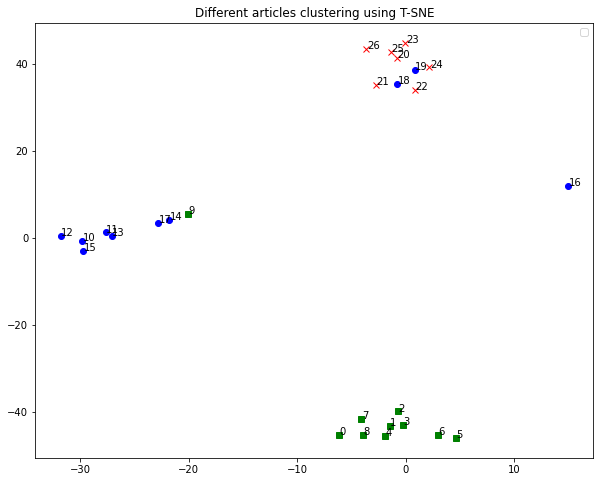

In [29]:
import matplotlib.pyplot as plt

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))
for i in range(0,10):
    plt.plot(df['X'][i],df['y'][i], marker = 's', color = 'green')
    plt.text(df['X'][i]+.05, df['y'][i]+.05, i, fontsize=10)

for i in range(10,20):
    plt.plot(df['X'][i],df['y'][i], marker = 'o', color = 'blue')
    plt.text(df['X'][i]+.05, df['y'][i]+.05, i, fontsize=10)

for i in range(20,27):
    plt.plot(df['X'][i],df['y'][i], marker = 'x', color = 'red')
    plt.text(df['X'][i]+.05, df['y'][i]+.05, i, fontsize=10)

plt.title("Different articles clustering using T-SNE")
plt.legend()

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


The plot demonstrates that T-SNE does a decent job of grouping the articles(creating clusters), with the majority of the articles clearly distinguishable within the clusters. A few have been missorted, however that might be improved by either adding additional articles or adjusting the perplexity values further. The clusters(groups) are shown with different shapes and colors. There is also one outlier but it does not has a significant effect.

# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\ATAISH
[nltk_data]     NEHRA\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [31]:
# Import the data.csv only use 'text' and 'target' columns
data = pd.read_csv('data-1.csv', usecols=['text', 'target'])
data['text'] = data['text'].apply(lambda x: clean_text(x))

# Split the data into training and validation sets 80-20 split
train_size = int(0.8 * len(data))
train_data = data[:train_size]
valid_data = data[train_size:]
# and printout the train.shape and validation.shape 
print("Training set shape:", train_data.shape)
print("Validation set shape:", valid_data.shape)
# expected shape of dataset is (7613, 2)
print("Shape of dataset:",data.shape)

Training set shape: (6090, 2)
Validation set shape: (1523, 2)
Shape of dataset: (7613, 2)


In [32]:
# clean the text in the dataframe using the clean_text function provided above
data['text'] = data['text'].apply(lambda x: clean_text(x))

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with default parameters
count_vectorizer = CountVectorizer()
# fit and transform on dataset:
# Fit and transform the training data
train_counts = count_vectorizer.fit_transform(train_data['text'])

# Transform the validation data using the fitted vectorizer
valid_counts = count_vectorizer.transform(valid_data['text'])

data_random_vector = count_vectorizer.fit_transform(data["text"])

In [34]:
# get the values of target column

y = data['target'].values

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [35]:
import tensorflow as tf

tf.random.set_seed(42)

# Complete this linear model in TensorFlow
def build_model(X):
    # Layer 1: Input layer
    inp = tf.keras.Input((X.shape[1],))

    # Layer 2: Dense layer with 64 units and ReLU activation
    dense1 = tf.keras.layers.Dense(64, activation='relu')(inp)

    # Layer 3: Dropout layer with dropout rate of 0.5
    dropout1 = tf.keras.layers.Dropout(0.5)(dense1)

    # Layer 4: Dense layer with 32 units with tanh activation and L2 regularization
    dense2 = tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2())(dropout1)

    # Layer 5: Dropout layer with dropout rate of 0.5
    dropout2 = tf.keras.layers.Dropout(0.5)(dense2)

    # Layer 6: Dense layer with 16 units with tanh activation and L2 regularization
    dense3 = tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2())(dropout2)

    # Layer 7: Dropout layer with dropout rate of 0.5
    dropout3 = tf.keras.layers.Dropout(0.5)(dense3)

    # Layer 8: Output layer with units equal to 1 and activation as sigmoid
    out = tf.keras.layers.Dense(1, activation='sigmoid')(dropout3)

    # Define the model with the input and output layers
    model = tf.keras.Model(inputs=inp, outputs=out)

    # Use binary crossentropy as the loss, RMSprop as the optimizer, and evaluate model on AUC
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.AUC(name='auc_roc')])

    return model

Epoch 1/5
381/381 [==============================] - 5s 10ms/step - loss: 0.7859 - auc_roc: 0.7323 - val_loss: 0.6466 - val_auc_roc: 0.7325
Epoch 2/5
381/381 [==============================] - 4s 9ms/step - loss: 0.4894 - auc_roc: 0.8744 - val_loss: 0.6436 - val_auc_roc: 0.7327
Epoch 3/5
381/381 [==============================] - 4s 9ms/step - loss: 0.4259 - auc_roc: 0.9003 - val_loss: 0.6402 - val_auc_roc: 0.7349
Epoch 4/5
381/381 [==============================] - 4s 9ms/step - loss: 0.3957 - auc_roc: 0.9119 - val_loss: 0.6370 - val_auc_roc: 0.7322
Epoch 5/5
381/381 [==============================] - 4s 9ms/step - loss: 0.3776 - auc_roc: 0.9192 - val_loss: 0.6323 - val_auc_roc: 0.7332


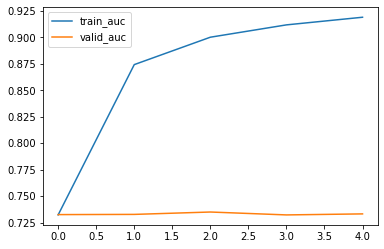

Epoch 1/5
381/381 [==============================] - 4s 10ms/step - loss: 0.7830 - auc_roc: 0.7688 - val_loss: 0.6786 - val_auc_roc: 0.7063
Epoch 2/5
381/381 [==============================] - 3s 9ms/step - loss: 0.4733 - auc_roc: 0.8870 - val_loss: 0.7037 - val_auc_roc: 0.7049
Epoch 3/5
381/381 [==============================] - 3s 9ms/step - loss: 0.4111 - auc_roc: 0.9097 - val_loss: 0.7145 - val_auc_roc: 0.7030
Epoch 4/5
381/381 [==============================] - 4s 9ms/step - loss: 0.3772 - auc_roc: 0.9214 - val_loss: 0.7442 - val_auc_roc: 0.6985
Epoch 5/5
381/381 [==============================] - 3s 9ms/step - loss: 0.3538 - auc_roc: 0.9299 - val_loss: 0.7531 - val_auc_roc: 0.6950


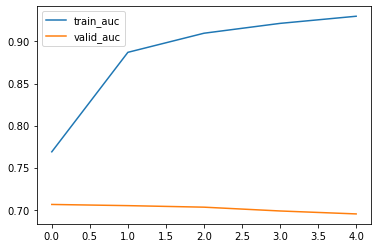

Epoch 1/5
381/381 [==============================] - 5s 11ms/step - loss: 0.7873 - auc_roc: 0.7394 - val_loss: 0.6470 - val_auc_roc: 0.7553
Epoch 2/5
381/381 [==============================] - 4s 11ms/step - loss: 0.4841 - auc_roc: 0.8762 - val_loss: 0.6354 - val_auc_roc: 0.7561
Epoch 3/5
381/381 [==============================] - 4s 10ms/step - loss: 0.4136 - auc_roc: 0.9059 - val_loss: 0.6752 - val_auc_roc: 0.7562
Epoch 4/5
381/381 [==============================] - 4s 10ms/step - loss: 0.3834 - auc_roc: 0.9168 - val_loss: 0.6655 - val_auc_roc: 0.7561
Epoch 5/5
381/381 [==============================] - 4s 10ms/step - loss: 0.3621 - auc_roc: 0.9250 - val_loss: 0.6622 - val_auc_roc: 0.7568


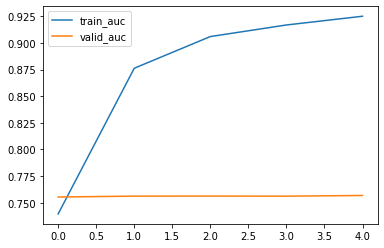

Epoch 1/5
381/381 [==============================] - 5s 11ms/step - loss: 0.7755 - auc_roc: 0.7567 - val_loss: 0.6727 - val_auc_roc: 0.7216
Epoch 2/5
381/381 [==============================] - 4s 10ms/step - loss: 0.4787 - auc_roc: 0.8821 - val_loss: 0.6703 - val_auc_roc: 0.7271
Epoch 3/5
381/381 [==============================] - 4s 11ms/step - loss: 0.4128 - auc_roc: 0.9095 - val_loss: 0.6713 - val_auc_roc: 0.7230
Epoch 4/5
381/381 [==============================] - 4s 10ms/step - loss: 0.3809 - auc_roc: 0.9212 - val_loss: 0.6721 - val_auc_roc: 0.7222
Epoch 5/5
381/381 [==============================] - 4s 10ms/step - loss: 0.3619 - auc_roc: 0.9271 - val_loss: 0.7106 - val_auc_roc: 0.7225


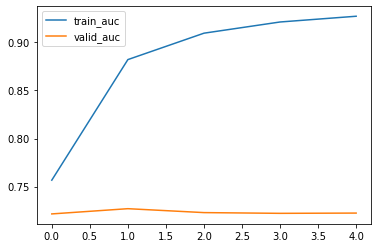

Epoch 1/5
381/381 [==============================] - 5s 11ms/step - loss: 0.7827 - auc_roc: 0.7200 - val_loss: 0.5623 - val_auc_roc: 0.8467
Epoch 2/5
381/381 [==============================] - 4s 11ms/step - loss: 0.5052 - auc_roc: 0.8672 - val_loss: 0.5098 - val_auc_roc: 0.8497
Epoch 3/5
381/381 [==============================] - 4s 10ms/step - loss: 0.4405 - auc_roc: 0.8959 - val_loss: 0.5204 - val_auc_roc: 0.8513
Epoch 4/5
381/381 [==============================] - 4s 10ms/step - loss: 0.4143 - auc_roc: 0.9067 - val_loss: 0.5089 - val_auc_roc: 0.8503
Epoch 5/5
381/381 [==============================] - 4s 9ms/step - loss: 0.3896 - auc_roc: 0.9141 - val_loss: 0.5289 - val_auc_roc: 0.8497


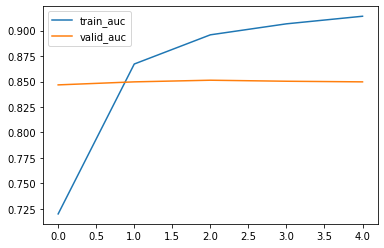

In [36]:
## 5 SETS OF EPOCHS, EACH SET CONTAINING 5 EPOCHS (AS GIVEN IN THE ORIGINAL COMMENTED QUESTION NOTEBOOK).
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=5)
splits = skf.split(data_random_vector, y)
for train_index, valid_index in splits:
    X_train, X_valid = data_random_vector[train_index], data_random_vector[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    #call the build_model function and initialize the model
    model = build_model(X_train)
    history = model.fit(X_train.toarray(), y_train, epochs=5, batch_size=16, validation_data=(X_valid.toarray(), y_valid))
    plt.plot(history.history['auc_roc'], label='train_auc')
    plt.plot(history.history['val_auc_roc'], label='valid_auc')
    plt.legend()
    plt.show()

### Q) Comment on the plots. How did it varied across different folds for neural networks?

With each Fold (i.e. an iteration), validation loss shows a general decrease in the trend, although there are some exceptions in between but the overall pattern is going downwards. For the validation accuracy(i.e. the test accuracy of our model), ROC-AUC shows an increasing pattern with final AUC being 85 percent on average. The training accuracy for each fold is the same and as number of folds increase, the model has a shaky test accuracy but performs very well upon reaching the fifth fold. Note: Each fold has 5 epochs each.

# Building Multinomial Navie Bayes on Countvectors

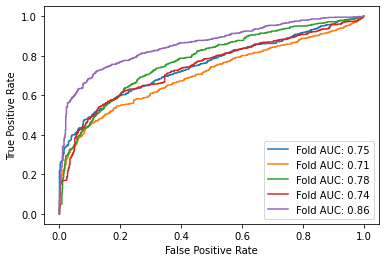

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score

# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
skf = StratifiedKFold(n_splits=5)
splits = skf.split(data_random_vector, y)

# Get X_train, X_valid, y_train, y_valid using indexes
for train_index, valid_index in splits:
    X_train, X_valid = data_random_vector[train_index], data_random_vector[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    # initialize multinomial naive bayes with default parameters
    model = MultinomialNB()

    # fit the data
    model.fit(X_train, y_train)

    # predict the probability for validation data
    y_pred_proba = model.predict_proba(X_valid)[:, 1]

    # plot AUC-ROC curve for validation data
    fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
    auc = roc_auc_score(y_valid, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Fold AUC: {auc:.2f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

We can see that all the folds end up being closer to 1, indicates that the classifier has a high probability of correctly classifying positive samples as positive and negative samples as negative, across a wide range of classification thresholds. The accuracy of correct predictions keep increasing with a mean of around 0.768 or 77 percent. Multinomial bayes has done pretty well for predicting correct classes with the least accuracy being 71 percent and most being 86 percent. 

.......................................................................................................................................................................................................................................................

CONCEPT:

The dataset is split into five folds, with each fold used once as a validation set and the remaining four folds used as a training set. During each fold, the model is trained for five epochs using the fit() method and the history variable is used to collect the performance metrics such as the AUC ROC score for both the training and validation sets. Finally, the code generates a plot showing the AUC ROC score for both the training and validation sets over the five folds.
When using a k-fold cross-validation technique, "one auc fold" refers to the results of the model evaluation on a single fold of the data. In the provided code, the data is split into five folds using StratifiedKFold with n_splits=5, meaning that the data is divided into five equal parts, and the model is trained and evaluated five times, with each fold used as the validation set once.

So, "one auc fold" refers to the evaluation of the model's performance on the validation set of one of the five folds of the data. The evaluation metric used in this case is AUC-ROC, which is a common metric for binary classification problems that measures the ability of the model to distinguish between positive and negative classes.

When true positive rate (TPR) is on the y-axis and false positive rate (FPR) is on the x-axis, the area under the receiver operating characteristic curve (ROC AUC) represents the performance of a binary classifier in distinguishing between positive and negative classes.

The ROC curve is created by plotting the TPR against the FPR at different classification thresholds. The TPR, also known as sensitivity, represents the proportion of true positive predictions out of all positive samples in the dataset, while the FPR represents the proportion of false positive predictions out of all negative samples in the dataset.

The ROC AUC measures the overall performance of the classifier across all possible classification thresholds, ranging from the highest probability threshold (which classifies all samples as negative) to the lowest probability threshold (which classifies all samples as positive). A classifier with a high ROC AUC score, closer to 1, indicates that the classifier has a high probability of correctly classifying positive samples as positive and negative samples as negative, across a wide range of classification thresholds. In contrast, a classifier with a ROC AUC score closer to 0.5 is no better than random classification, while a score below 0.5 indicates that the classifier performs worse than random guessing.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

Popular Natural Language Processing (NLP) methods for transforming text into a numerical representation that may be utilized by machine learning models include Count Vectorizer, TF-IDF, Word2Vec, and GloVe. These methods' representations of the text and the information they gather are where they diverge most from one another.

Count Vectorizer: This straightforward method turns the text into a bag of words model, where each word is represented by how frequently it appears in the text. Think about the phrase "The swift brown fox hopped over the slow hound," for instance. The phrase would be shown as [1, 1, 2, 1, 1, 1, 1, 1, 1, 1] using Count Vectorizer. This method has the benefit of being simple to use and effective in highlighting key phrases in documents.

TF-IDF: The statistical metric known as TF-IDF, or term frequency-inverse document frequency, assesses the significance of each word in a document. Both the frequency of the term in the text and the frequency of the word in the corpus are taken into consideration. Take the previous statement as an example. The following would be the TF-IDF representation of the sentence: [0.18, 0.18, 0.36, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18]. This method has the benefit of allowing terms that are significant in a document but uncommon in the corpus to be given more weight.

Word2Vec: This neural network-based method renders each word as a vector in a high-dimensional space. The context of the words' appearances in the corpus is used to build the vectors. Take the phrase "The cat chased the mouse" as an example. The words "cat" and "mouse," when represented using Word2Vec, would appear as vectors that are close to one another in the high-dimensional space, suggesting that they are connected. This method has the benefit of being able to identify the semantic connections between words.

GloVe: GloVe is an acronym for "Global Vectors for Word Representation" and refers to a method that combines the Word2Vec predictive approach with the count-based approach of the Count Vectorizer. It is predicated on the notion that the link between two words may be inferred from the ratio of their co-occurrence probability. Take the phrase "The cat chased the mouse" as an example. The words "cat" and "mouse" would be represented by vectors that are close to one another using GloVe, demonstrating their relationship. This method has the benefit of being able to record both the semantic and syntactic links between words.

In conclusion, the ways that Count Vectorizer, TF-IDF, Word2Vec, and GloVe depict the text and the data they collect differ significantly from one another. Word2Vec and GloVe are based on the semantic and syntactic links between words, whereas Count Vectorizer and TF-IDF are based on the frequency of words in a document or corpus. While Word2Vec and GloVe are more sophisticated and need training on a big corpus, Count Vectorizer and TF-IDF are straightforward algorithms.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

Both the Bag of Words (BoW) and the Term Frequency-Inverse Document Frequency (TF-IDF) methods are used for text classification using the Naive Bayes algorithm. However, there are significant differences between them.

The Bag of Words method represents each document as a vector of word frequencies, with the value of each dimension in the vector being the count of the corresponding word in the document. This approach does not take into account the importance of words in the document. As a result, it treats all words equally, and frequent words may dominate the classification process.

On the other hand, the TF-IDF method takes into account the importance of words in the document. It considers not only the frequency of a word in a document but also its frequency in the entire corpus of documents. The importance of a word is inversely proportional to the frequency of the word in the corpus. Therefore, words that are frequent in a document but infrequent in the corpus will have a high TF-IDF value and will be given more importance in the classification process.

The main difference between Naive Bayes implementation using Bag of Words and TF-IDF is in the way that the feature vectors are constructed.

In Naive Bayes with Bag of Words, each feature in the feature vector corresponds to a single word in the document. The value of the feature is the number of times that word appears in the document. For example, consider the following two documents:

Document 1: "The quick brown fox jumps over the lazy dog"
Document 2: "The lazy dog sleeps all day"

With Bag of Words, the feature vectors for these documents might look like this:

Document 1: [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
Document 2: [1, 0, 0, 0, 1, 0, 1, 1, 1, 1]

Here, each element in the feature vector corresponds to a unique word in the documents, and the value of each element is the count of how many times that word appears in the document.

In contrast, with Naive Bayes using TF-IDF, the feature vectors take into account the importance of each word in the document, as well as how often it appears in the corpus. In this approach, the value of each feature in the feature vector is the product of the term frequency and inverse document frequency for each word.

For example, using the same two documents as before, the feature vectors for these documents with TF-IDF might look like this:

Document 1: [0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.00, 0.00, 0.00]
Document 2: [0.22, 0.00, 0.00, 0.00, 0.22, 0.00, 0.22, 0.30, 0.30, 0.30]

Here, the values of the feature vectors are weighted by their relative importance in the corpus. Words that appear more frequently in the corpus are given a lower weight, while those that are unique to a document are given a higher weight. This allows the algorithm to differentiate more effectively between documents that have similar word frequencies but different word importance.

Overall, while both Bag of Words and TF-IDF are effective ways to represent text for Naive Bayes classification, TF-IDF provides a more nuanced representation of the text by taking into account the importance of each word in the document and in the corpus.

In summary, the significant difference between Naive Bayes implementation using Bag of Words and TF-IDF is that the Bag of Words approach only considers the frequency of words in the document, whereas the TF-IDF approach considers the importance of words in the document and the corpus.